# Buat file formatting biar bisa fokus

### Formatting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Uji Statistic

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./Supermarket Customers.csv', sep='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


Membuat kolom baru untuk mempermudah dan mengubah tipe data yang sesuai dengan kolomnya

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
### Membuat kolom tanggal acuan data dikumpulkan
df['Observed_Time'] = '2015-02-02'
df['Observed_Time'] = pd.to_datetime(df['Observed_Time'])
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [6]:
### Membuat kolom umur dari data Year_Birth agar lebih mudah dipahami
df['Age'] = 2015 - df['Year_Birth']

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,2015-02-02,58
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,2015-02-02,61
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,2015-02-02,50
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,2015-02-02,31
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,2015-02-02,34


In [8]:
## Mengelompokan ketagori customer kedalam segmentasi berdasarkan kelahiran

kel=[]
for i in range(len(df)):
    if df['Year_Birth'][i]<1945:
        kel.append('Pre-boomer')
    elif df['Year_Birth'][i]<=1945 or df['Year_Birth'][i]<=1964:
        kel.append('Baby boomer')
    elif df['Year_Birth'][i]<=1965 or df['Year_Birth'][i]<=1980:
        kel.append('Gen X')
    elif df['Year_Birth'][i]<=1981 or df['Year_Birth'][i]<=1996:
        kel.append('Milenial')
    else:
        kel.append('Gen Z')

df['Generation_Types'] = kel

In [9]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Age,Generation_Types
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,2015-02-02,58,Baby boomer
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,2015-02-02,61,Baby boomer
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,2015-02-02,50,Gen X
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,2015-02-02,31,Milenial
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,2015-02-02,34,Milenial


In [10]:
## Mengelompokan ketagori customer kedalam segmentasi berdasarkan Income

kel = []
for i in range(len(df)):
    if df['Income'][i]<5000:
        kel.append('Poor')
    elif df['Income'][i]<=5001 or df['Income'][i]<=50000:
        kel.append('Lower Middle Class')
    elif df['Income'][i]<=50001 or df['Income'][i]<=70000:
        kel.append('Middle')
    elif df['Income'][i]<=70001 or df['Income'][i]<=100000:
        kel.append('Upper Middle Class')
    else:
        kel.append('Rich')

df['Income_Status'] = kel

In [11]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Age,Generation_Types,Income_Status
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,3,11,1,2015-02-02,58,Baby boomer,Middle
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,3,11,0,2015-02-02,61,Baby boomer,Lower Middle Class
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,2015-02-02,50,Gen X,Upper Middle Class
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,3,11,0,2015-02-02,31,Milenial,Lower Middle Class
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,2015-02-02,34,Milenial,Middle


In [12]:
## Mengelompokan ketagori customer kedalam segmentasi berdasarkan Recency

kel = []
for i in range(len(df)):
    if df['Recency'][i]<30:
        kel.append('30 Days')
    elif df['Recency'][i]<=30 or df['Recency'][i]<=60:
        kel.append('60 Days')
    elif df['Recency'][i]<=60 or df['Recency'][i]<=90:
        kel.append('90 Days')
    elif df['Recency'][i]<=90 or df['Recency'][i]<=120:
        kel.append('120 Days')
    
df['LastPurchase'] = kel

In [13]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Observed_Time,Age,Generation_Types,Income_Status,LastPurchase
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,2015-02-02,58,Baby boomer,Middle,60 Days
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,2015-02-02,61,Baby boomer,Lower Middle Class,60 Days
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,2015-02-02,50,Gen X,Upper Middle Class,30 Days
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,2015-02-02,31,Milenial,Lower Middle Class,30 Days
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,2015-02-02,34,Milenial,Middle,120 Days


In [14]:
df['Total_Campaign'] = df['AcceptedCmp1'] +df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['Total_Purchase'] = df['NumCatalogPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']
df['Total_Spending'] = df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines']

In [15]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Observed_Time,Age,Generation_Types,Income_Status,LastPurchase,Total_Campaign,Total_Purchase,Total_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,11,1,2015-02-02,58,Baby boomer,Middle,60 Days,0,25,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,11,0,2015-02-02,61,Baby boomer,Lower Middle Class,60 Days,0,6,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,2015-02-02,50,Gen X,Upper Middle Class,30 Days,0,21,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,11,0,2015-02-02,31,Milenial,Lower Middle Class,30 Days,0,8,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,11,0,2015-02-02,34,Milenial,Middle,120 Days,0,19,422


Membuat kolom 3 kolom baru:
- Total_Campaign : untuk mengetahui total campaign yang diterima user dari pertama sampai akhir
- Total_Purchase : Untuk mengetahui berapa kali total pembelian dari semua channel
- Total_Spending : Untuk mengetahui total yang dikeluarkan untuk product

### Missing Values

#### Drop kolom

In [16]:
col_drop = ['ID','Year_Birth','Z_CostContact','Z_Revenue']
df = df.drop(col_drop, axis=1)

In [17]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Response,Observed_Time,Age,Generation_Types,Income_Status,LastPurchase,Total_Campaign,Total_Purchase,Total_Spending
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,0,1,2015-02-02,58,Baby boomer,Middle,60 Days,0,25,1617
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,0,0,2015-02-02,61,Baby boomer,Lower Middle Class,60 Days,0,6,27
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,2015-02-02,50,Gen X,Upper Middle Class,30 Days,0,21,776
3,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,...,0,0,2015-02-02,31,Milenial,Lower Middle Class,30 Days,0,8,53
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,2015-02-02,34,Milenial,Middle,120 Days,0,19,422


In [18]:
df.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Observed_Time           0
Age                     0
Generation_Types        0
Income_Status           0
LastPurchase            0
Total_Campaign          0
Total_Purchase          0
Total_Spending          0
dtype: int64

#### Drop baris

In [19]:
df.dropna(subset=['Income'], inplace=True)

In [20]:
df.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Observed_Time          0
Age                    0
Generation_Types       0
Income_Status          0
LastPurchase           0
Total_Campaign         0
Total_Purchase         0
Total_Spending         0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2216 non-null   object        
 1   Marital_Status       2216 non-null   object        
 2   Income               2216 non-null   float64       
 3   Kidhome              2216 non-null   int64         
 4   Teenhome             2216 non-null   int64         
 5   Dt_Customer          2216 non-null   datetime64[ns]
 6   Recency              2216 non-null   int64         
 7   MntWines             2216 non-null   int64         
 8   MntFruits            2216 non-null   int64         
 9   MntMeatProducts      2216 non-null   int64         
 10  MntFishProducts      2216 non-null   int64         
 11  MntSweetProducts     2216 non-null   int64         
 12  MntGoldProds         2216 non-null   int64         
 13  NumDealsPurchases    2216 non-nul

Menghapus baris customer yang tidak memiliki pendapatan, karena untuk saat hanya fokus ke pelanggan yang hanya memiliki income. Jika customer tidak memiliki data income tidak bisa menjadi acuan untuk menjadi potensi karena bagaimana ingin membeli product kita jika tidak memiliki income.

karena tadi ada data outlier pada kolom `Income` dan akan di drop karena akan dilakukan cara khusus untuk menanganinya maka dari itu akan kita drop

In [22]:
# Melakukan pengecekan untuk kolom Income
df[['Income']].sort_values('Income', ascending=False).head(5)

,Income
2233,666666.0
617,162397.0
687,160803.0
1300,157733.0
164,157243.0


yang income paling tinggi '666666.0' akan di drop

In [23]:
df.drop(2233, inplace=True)

In [24]:
df[['Income']].sort_values('Income', ascending=False).head(5)

,Income
617,162397.0
687,160803.0
1300,157733.0
164,157243.0
1653,157146.0


mencari data yang complain

In [25]:
sum_comp = df['Complain'].sum()
sum_comp

21

In [26]:
all_data = df['Complain'].notnull().sum()
all_data

2215

In [27]:
percentasi_comp = (sum_comp/all_data)*100
result = round(percentasi_comp, 3)
print(f'untuk persentase data yang komplen hanya {result}% dari {all_data} Data')

untuk persentase data yang komplen hanya 0.948% dari 2215 Data


karena angka persentase yang terlalu rendah dari total data maka dari itu akan di drop dan data yang di drop untuk dataset ini akan di alihkan melalui divisi lain untuk dapat FU kenapa bisa sampai complain

**Menghapus kolom yang komplain**

In [24]:
# # tidak jadi & tidak masalah kata Ka ragil
# df.drop(df[df['Complain'] > 0].index, inplace=True)

memastikan kembali

In [28]:
all_data = df['Complain'].notnull().sum()
all_data

2215

In [29]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Response,Observed_Time,Age,Generation_Types,Income_Status,LastPurchase,Total_Campaign,Total_Purchase,Total_Spending
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,0,1,2015-02-02,58,Baby boomer,Middle,60 Days,0,25,1617
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,0,0,2015-02-02,61,Baby boomer,Lower Middle Class,60 Days,0,6,27
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,2015-02-02,50,Gen X,Upper Middle Class,30 Days,0,21,776
3,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,...,0,0,2015-02-02,31,Milenial,Lower Middle Class,30 Days,0,8,53
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,2015-02-02,34,Milenial,Middle,120 Days,0,19,422


### Statistic

In [30]:
display(df.describe(), df.describe(include='object'))

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Campaign,Total_Purchase,Total_Spending
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,51969.861400,0.441535,0.505643,49.024379,305.225282,26.361625,167.063205,37.651016,27.040632,43.979684,...,0.074041,0.073138,0.064108,0.013544,0.009481,0.150339,46.183296,0.298420,14.882619,607.321445
std,21526.320095,0.536886,0.544198,28.949608,337.345380,39.802036,224.311559,54.760822,41.077594,51.822660,...,0.261896,0.260421,0.245001,0.115614,0.096929,0.357484,11.987000,0.679332,7.672246,602.925291
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000
25%,35284.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,8.000000,69.000000
50%,51373.000000,0.000000,0.000000,49.000000,175.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,15.000000,397.000000
75%,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.500000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,0.000000,21.000000,1048.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,122.000000,4.000000,44.000000,2525.000000


,Education,Marital_Status,Generation_Types,Income_Status,LastPurchase
count,2215,2215,2215,2215,2215
unique,5,8,4,5,4
top,Graduation,Married,Gen X,Lower Middle Class,30 Days
freq,1115,857,1060,1054,685


### Data Analysis

Ingin mengetahui yang respon Campaign dari total customer yang ada

In [31]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Response,Observed_Time,Age,Generation_Types,Income_Status,LastPurchase,Total_Campaign,Total_Purchase,Total_Spending
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,0,1,2015-02-02,58,Baby boomer,Middle,60 Days,0,25,1617
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,0,0,2015-02-02,61,Baby boomer,Lower Middle Class,60 Days,0,6,27
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,2015-02-02,50,Gen X,Upper Middle Class,30 Days,0,21,776
3,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,...,0,0,2015-02-02,31,Milenial,Lower Middle Class,30 Days,0,8,53
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,2015-02-02,34,Milenial,Middle,120 Days,0,19,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,...,0,0,2015-02-02,48,Gen X,Middle,60 Days,0,18,1341
2236,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,...,0,0,2015-02-02,69,Baby boomer,Middle,60 Days,1,22,444
2237,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,...,0,0,2015-02-02,34,Milenial,Middle,120 Days,1,19,1241
2238,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,...,0,0,2015-02-02,59,Baby boomer,Middle,30 Days,0,23,843


In [32]:
responCamp = df['Response'].sum()
responCamp

333

In [33]:
result = (responCamp/all_data)*100
result

15.033860045146726

In [34]:
df.shape

(2215, 33)

In [35]:
df['Response'].value_counts()

0    1882
1     333
Name: Response, dtype: int64

dari total 2215 data yang ada di dataset ini jumlah yang respon akan campaign yang diberikan hanya 15.03 % dari total keseluruhan data ini selama 3 tahun terakhir ini dan ini dibawah target selama 3 tahun ini dengan target minimal 30% dari total data yang ada. 

In [36]:
result = (responCamp/all_data)*100
result

15.033860045146726

buat kolom bulan dan tahun

In [37]:
df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.month
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Observed_Time,Age,Generation_Types,Income_Status,LastPurchase,Total_Campaign,Total_Purchase,Total_Spending,Year,Month
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,2015-02-02,58,Baby boomer,Middle,60 Days,0,25,1617,2012,4
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,2015-02-02,61,Baby boomer,Lower Middle Class,60 Days,0,6,27,2014,8


In [38]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Observed_Time', 'Age', 'Generation_Types',
       'Income_Status', 'LastPurchase', 'Total_Campaign', 'Total_Purchase',
       'Total_Spending', 'Year', 'Month'],
      dtype='object')

In [39]:
trend_respon = df.groupby(['Year','Month'])[['Response']].sum().reset_index()
trend_df = trend_respon[['Year','Month','Response']]
trend_df

,Year,Month,Response
0,2012,1,5
1,2012,2,3
2,2012,3,5
3,2012,4,4
4,2012,5,1
5,2012,6,5
6,2012,7,7
7,2012,8,25
8,2012,9,26
9,2012,10,23


In [40]:
trend_df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [41]:
trend_df['Year'].unique()

array([2012, 2013, 2014], dtype=int64)

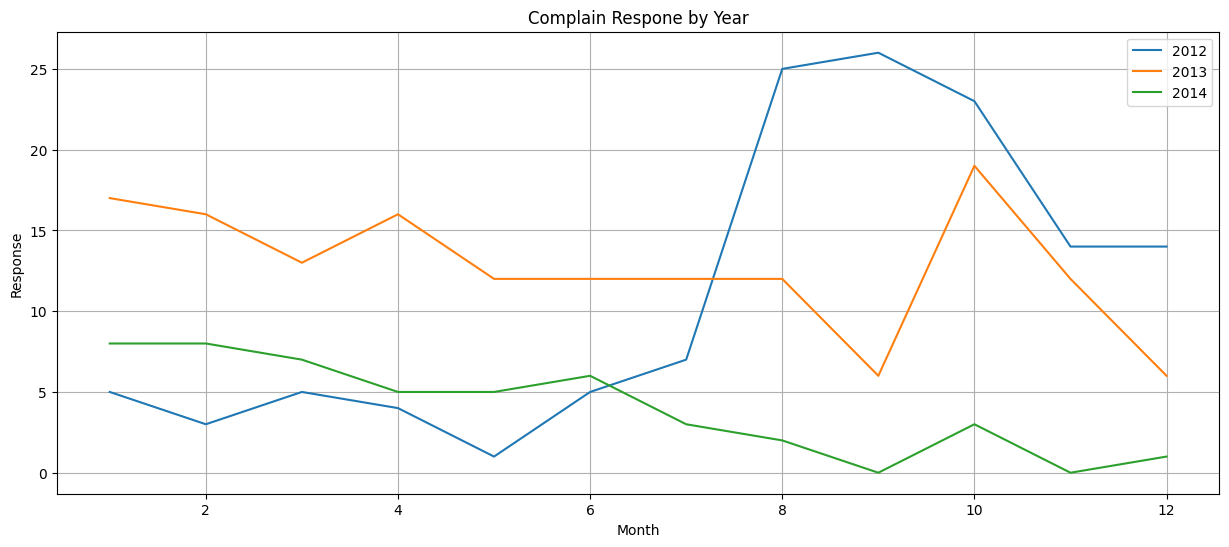

In [42]:
respon_pivot = trend_df.pivot(index='Month', columns='Year', values='Response')

fig, ax = plt.subplots(figsize=(15, 6))

plt.plot(respon_pivot.index, respon_pivot[2012], label='2012')
plt.plot(respon_pivot.index, respon_pivot[2013], label='2013')
plt.plot(respon_pivot.index, respon_pivot[2014], label='2014')

plt.title('Complain Respone by Year')
plt.xlabel('Month')
plt.ylabel('Response')

plt.legend()
ax.grid(True)
plt.show()

memiliki penurunan yang respon di tahun 2014 karena masih di cari tahu 

ngecek umur yang ngerespon

In [43]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Observed_Time,Age,Generation_Types,Income_Status,LastPurchase,Total_Campaign,Total_Purchase,Total_Spending,Year,Month
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,2015-02-02,58,Baby boomer,Middle,60 Days,0,25,1617,2012,4
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,2015-02-02,61,Baby boomer,Lower Middle Class,60 Days,0,6,27,2014,8
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,2015-02-02,50,Gen X,Upper Middle Class,30 Days,0,21,776,2013,8
3,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,...,2015-02-02,31,Milenial,Lower Middle Class,30 Days,0,8,53,2014,10
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,2015-02-02,34,Milenial,Middle,120 Days,0,19,422,2014,1


In [44]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Observed_Time', 'Age', 'Generation_Types',
       'Income_Status', 'LastPurchase', 'Total_Campaign', 'Total_Purchase',
       'Total_Spending', 'Year', 'Month'],
      dtype='object')

In [45]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Observed_Time,Age,Generation_Types,Income_Status,LastPurchase,Total_Campaign,Total_Purchase,Total_Spending,Year,Month
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,2015-02-02,58,Baby boomer,Middle,60 Days,0,25,1617,2012,4
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,2015-02-02,61,Baby boomer,Lower Middle Class,60 Days,0,6,27,2014,8
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,2015-02-02,50,Gen X,Upper Middle Class,30 Days,0,21,776,2013,8
3,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,...,2015-02-02,31,Milenial,Lower Middle Class,30 Days,0,8,53,2014,10
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,2015-02-02,34,Milenial,Middle,120 Days,0,19,422,2014,1


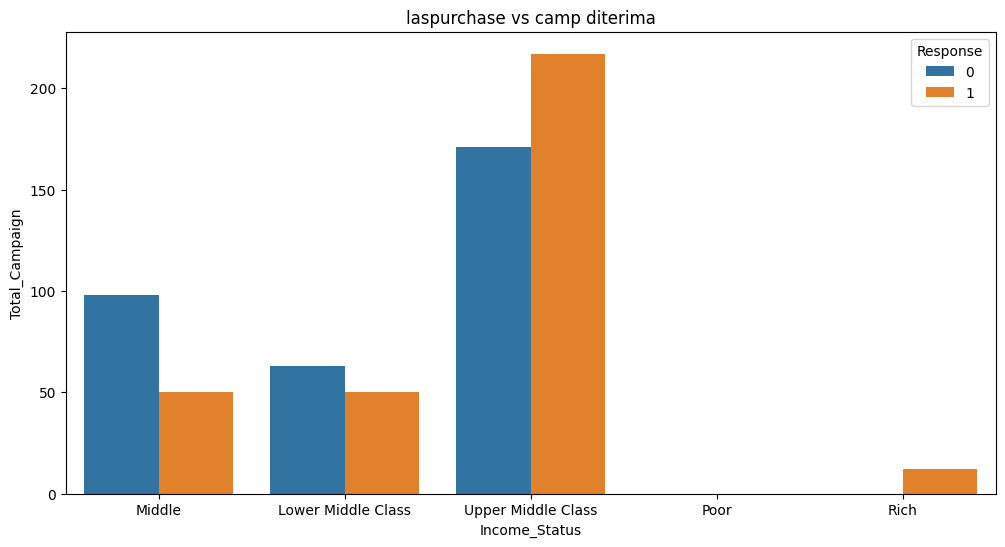

In [47]:
plt.figure(figsize=(12,6))
plt.title('laspurchase vs camp diterima')
sns.barplot(x='Income_Status',y='Total_Campaign',
            data=df, hue='Response',
            ci=None,
            estimator=np.sum)
plt.show()

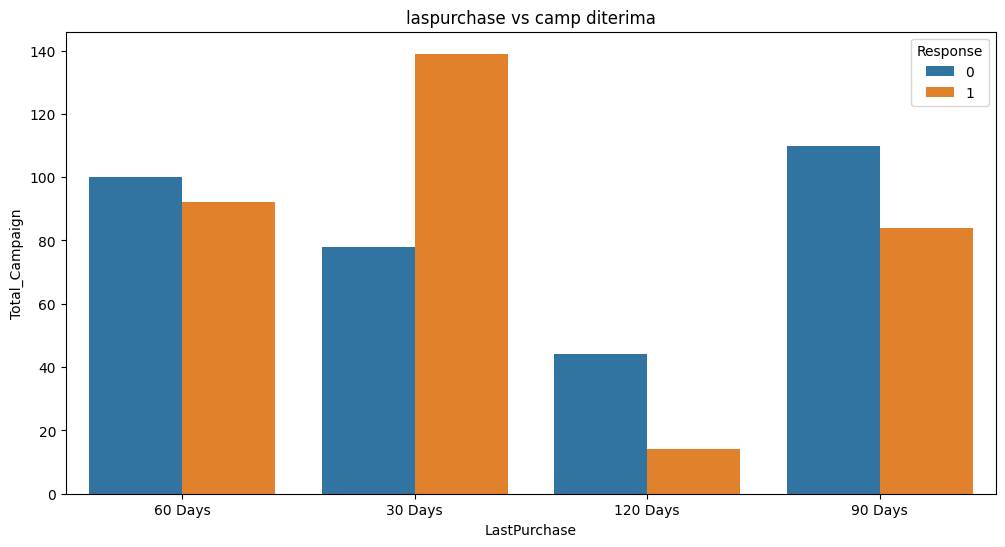

In [47]:
plt.figure(figsize=(12,6))
plt.title('laspurchase vs camp diterima')
sns.barplot(x='LastPurchase',y='Total_Campaign',
            data=df, hue='Response',
            ci=None,
            estimator=np.sum)
plt.show()

atas bisa jadi insight, kebanyakan dari yang nerima camp langsung beli kurang dari 30 hari

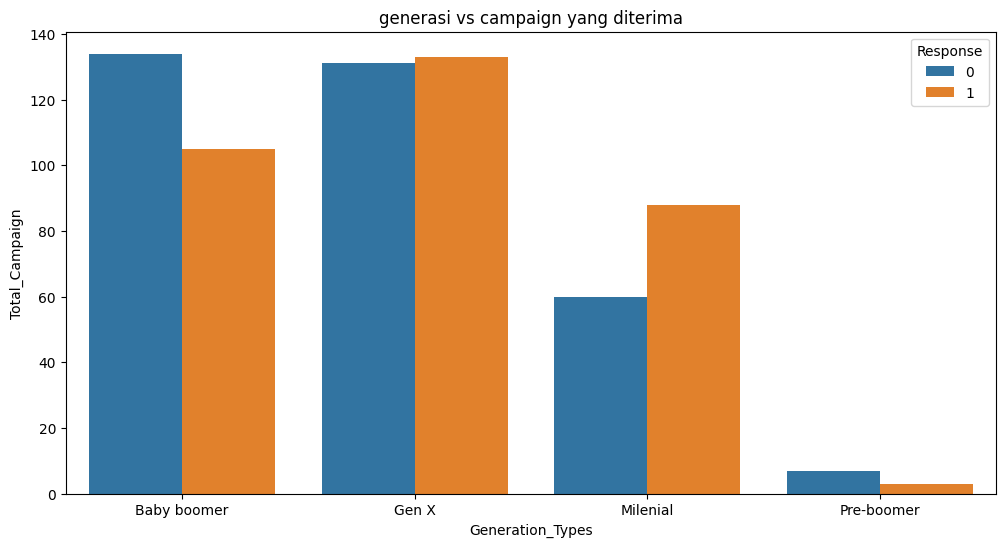

In [49]:
plt.figure(figsize=(12,6))
plt.title('generasi vs campaign yang diterima')
sns.barplot(x='Generation_Types',y='Total_Campaign',
            data=df, hue='Response',
            ci=None,
            estimator=np.sum)
plt.show()

ada korelasi semakin tinggi camp yang diterima semakin banyak yang respon juga

In [42]:
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Observed_Time,Age,Generation_Types,Income_Status,LastPurchase,Total_Campaign,Total_Purchase,Total_Spending,Year,Month
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,2015-02-02,58,Baby boomer,Middle,60 Days,0,25,1617,2012,4
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,2015-02-02,61,Baby boomer,Lower Middle Class,60 Days,0,6,27,2014,8


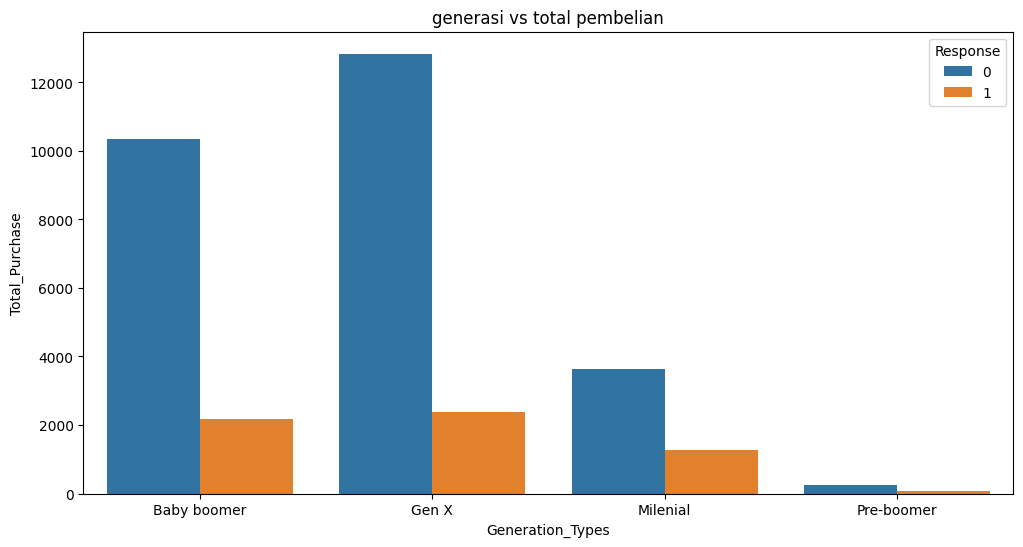

In [48]:
plt.figure(figsize=(12,6))
plt.title('generasi vs total pembelian')
sns.barplot(x='Generation_Types',y='Total_Purchase',
            data=df, hue='Response',
            ci=None,
            estimator=np.sum)
plt.show()

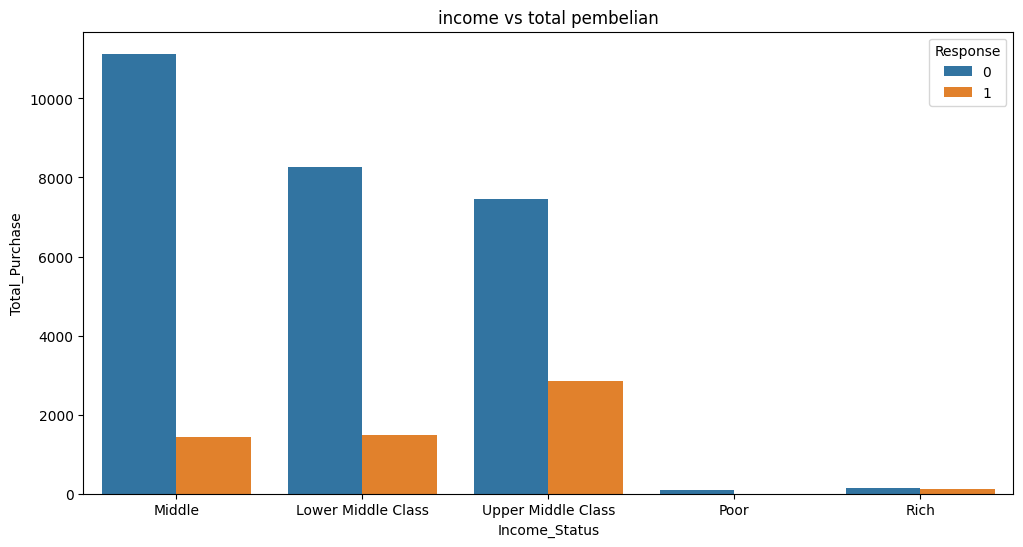

In [47]:
plt.figure(figsize=(12,6))
plt.title('income vs total pembelian')
sns.barplot(x='Income_Status',y='Total_Purchase',
            data=df, hue='Response',
            ci=None,
            estimator=np.sum)
plt.show()

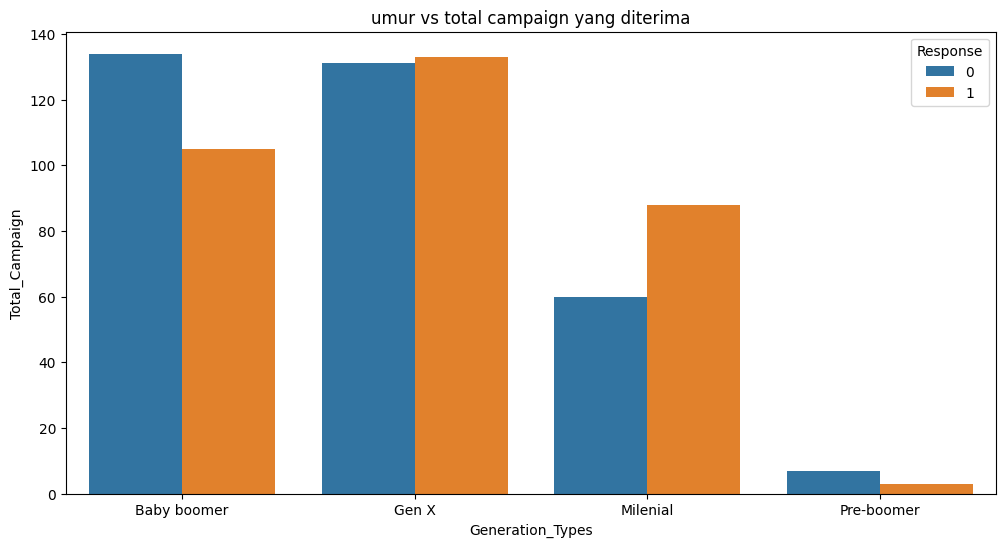

In [50]:
plt.figure(figsize=(12,6))
plt.title('umur vs total campaign yang diterima')
sns.barplot(x='Generation_Types',y='Total_Campaign',
            data=df, hue='Response',
            ci=None,
            estimator=np.sum)
plt.show()

In [213]:
gen_count = df['Generation_Types'].value_counts().reset_index().rename(columns={
    'index':'Generation_Types',
    'Generation_Types':'count'
})
gen_count

,Generation_Types,count
0,Gen X,1060
1,Baby boomer,757
2,Milenial,380
3,Pre-boomer,18


In [122]:
gen_count = df[['Generation_Types','Response']].groupby('Generation_Types').sum().reset_index()
gen_count

,Generation_Types,Response
0,Baby boomer,109
1,Gen X,145
2,Milenial,76
3,Pre-boomer,3


In [188]:
gen_count['count'].sum()

2215

In [174]:
# add_response = df.groupby('Generation_Types')['Response'].sum().reset_index()
# gen_count = gen_count.merge(add_response, on='Generation_Types')
# gen_count

,Generation_Types,count,Response
0,Gen X,1060,145
1,Baby boomer,757,109
2,Milenial,380,76
3,Pre-boomer,18,3
